In [1]:
import netCDF4 as nc
from salishsea_tools import nc_tools
import matplotlib.pyplot as plt
import numpy as np
import os
import re

%matplotlib inline

resultsDir='/data/eolson/MEOPAR/SS2DSOGruns/run00/'

In [2]:
def plotAllVars(resDir,fileName):
    f=nc.Dataset(os.path.join(resultsDir,fname))
    fkeys=f.variables.keys()
    lons=f.variables['nav_lon'][1,:]
    lats=f.variables['nav_lat'][:,1]
    for ik in fkeys:
        match = re.search(r'depth.',ik)
        if match:
            zkey=match.group(0)
    z=f.variables[zkey][:]

    xx,zz=np.meshgrid(lons,-z[:])
    xt,yt=np.meshgrid(lons,lats)
    
    
    # loop  through variables and plot them each in a figure
    for ikey in fkeys:
        if np.ndim(f.variables[ikey])==4:
            ivar=f.variables[ikey][:,:,:,:]
            ivar1=ivar[0,:,:,:]
            ivare=ivar[ivar.shape[0]-1,:,:,:]
            n=f.variables[ikey].standard_name
            u='(' + f.variables[ikey].units + ')'
            m=np.mean(ivar[np.where(np.tile(ivar[1,:,:,:],[ivar.shape[0],1,1,1])!=0)])
            s=np.std(ivar[np.where(np.tile(ivar[1,:,:,:],[ivar.shape[0],1,1,1])!=0)])
            mdiff=np.mean(ivare[np.where(ivar[1,:,:,:])!=0]-ivar1[np.where(ivar[1,:,:,:])!=0])
            sdiff=np.std(ivare[np.where(ivar[1,:,:,:])!=0]-ivar1[np.where(ivar[1,:,:,:])!=0])

            ivmin=m-5.0*s
            ivmax=m+5.0*s
            dvmin=mdiff-1.0*sdiff
            dvmax=mdiff+1.0*sdiff
    
            fig, axs = plt.subplots(6,1,figsize=(15,20))

            mesh0=axs[0].pcolormesh(xt,yt,ivar[0,0,:,:],vmin=ivmin,vmax=ivmax)
            axs[0].set_title('Surface ' + n + ' ' + u + ', t =1 hr')
            fig.colorbar(mesh0,ax=axs[0])
            axs[0].set_ylabel('y (km)')

            mesh1=axs[1].pcolormesh(xt,yt,ivar[ivar.shape[0]-1,0,:,:],vmin=ivmin,vmax=ivmax)
            axs[1].set_title('Surface ' + n + ' ' + u + ', t = end')
            fig.colorbar(mesh1,ax=axs[1])
            axs[1].set_ylabel('y (km)')

            mesh2=axs[2].pcolormesh(xx,zz,ivar[0,:,4,:],vmin=ivmin,vmax=ivmax)
            axs[2].set_title(n + ' ' + u + ', t = 1 hr')
            fig.colorbar(mesh2,ax=axs[2])
            axs[2].set_ylabel('Depth (m)')
            
            mesh3=axs[3].pcolormesh(xx,zz,ivar[ivar.shape[0]-1,:,4,:],vmin=ivmin,vmax=ivmax)
            axs[3].set_title(n + ' ' + u + ', t = end')
            fig.colorbar(mesh3,ax=axs[3])
            axs[3].set_ylabel('Depth (m)')
    
            mesh4=axs[4].pcolormesh(xt,yt,ivar[ivar.shape[0]-1,0,:,:]-ivar[0,0,:,:],vmin=dvmin,vmax=dvmax)
            axs[4].set_title('Difference in Surface ' + n + ' ' + u )
            fig.colorbar(mesh4,ax=axs[4])
            axs[4].set_ylabel('y (km)')
    
            mesh5=axs[5].pcolormesh(xx,zz,ivar[ivar.shape[0]-1,:,4,:]-ivar[0,:,4,:],vmin=dvmin,vmax=dvmax)
            axs[5].set_title('Difference in ' + n + ' ' + u )
            fig.colorbar(mesh5,ax=axs[5])
            axs[5].set_ylabel('Depth (m)')
            axs[5].set_xlabel('x (km)')
    f.close()

/home/eolson/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


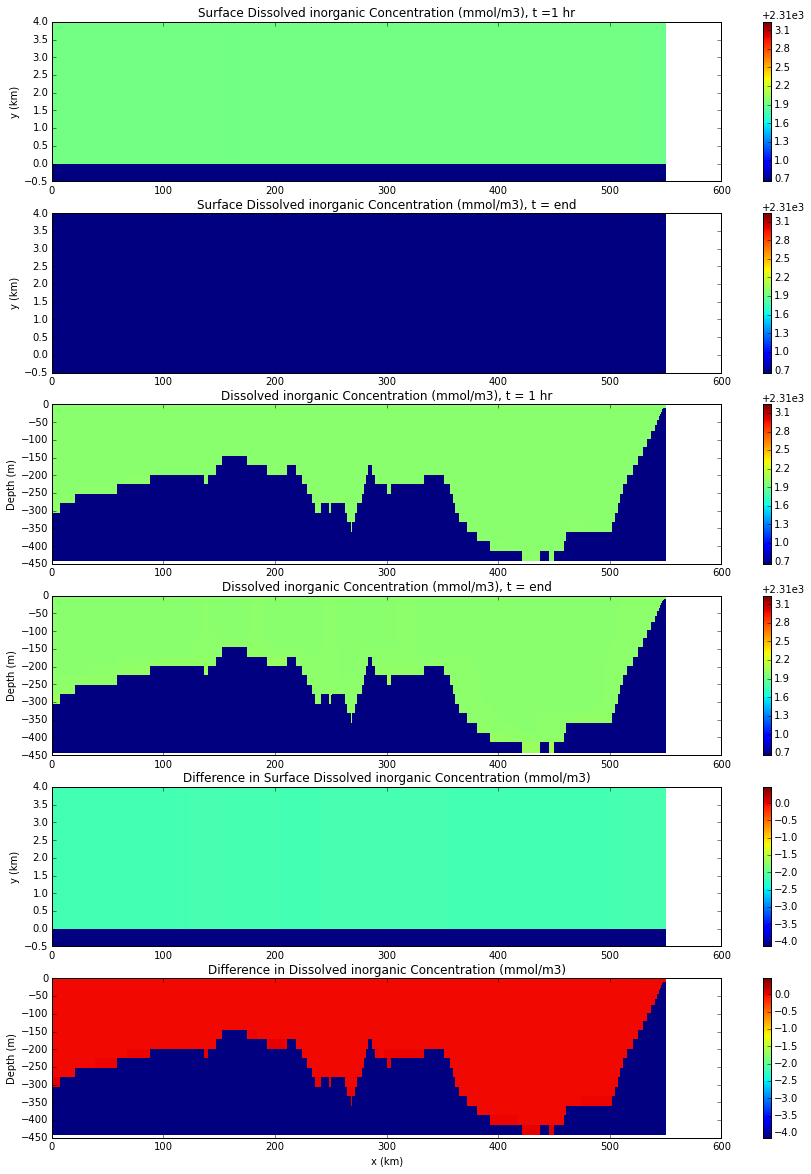

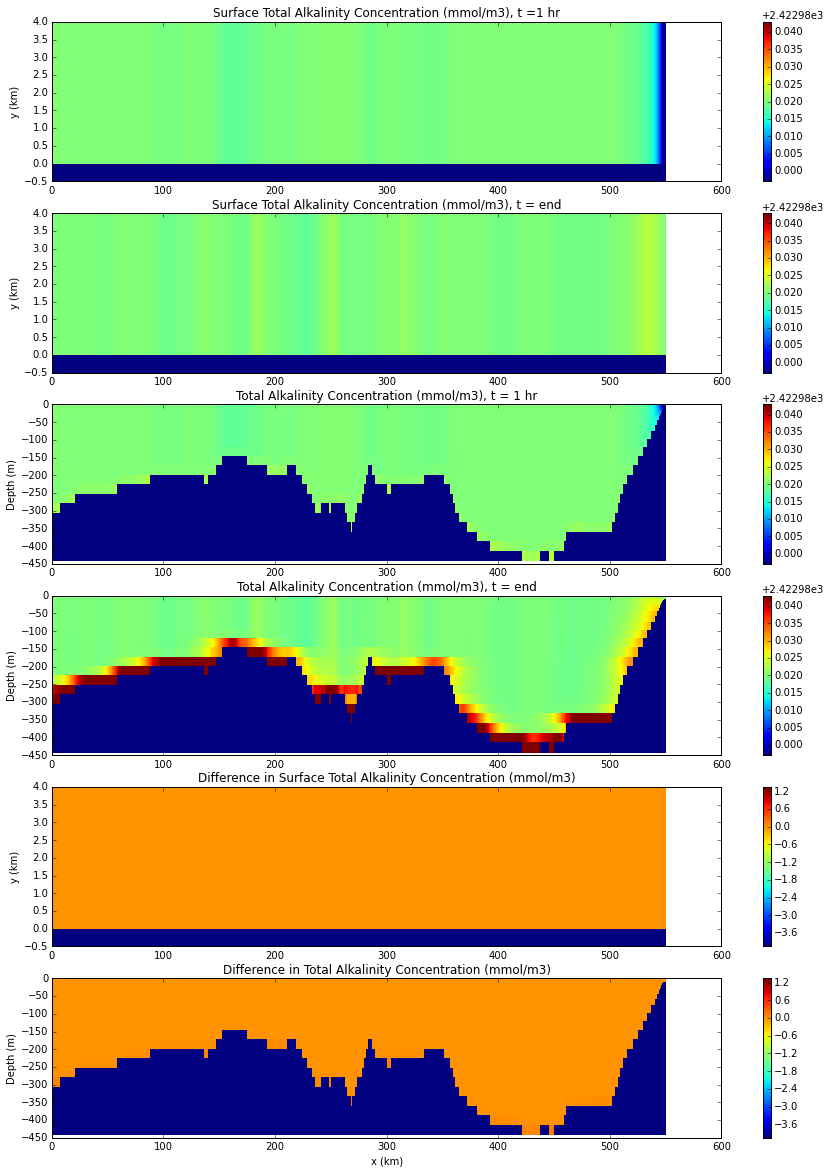

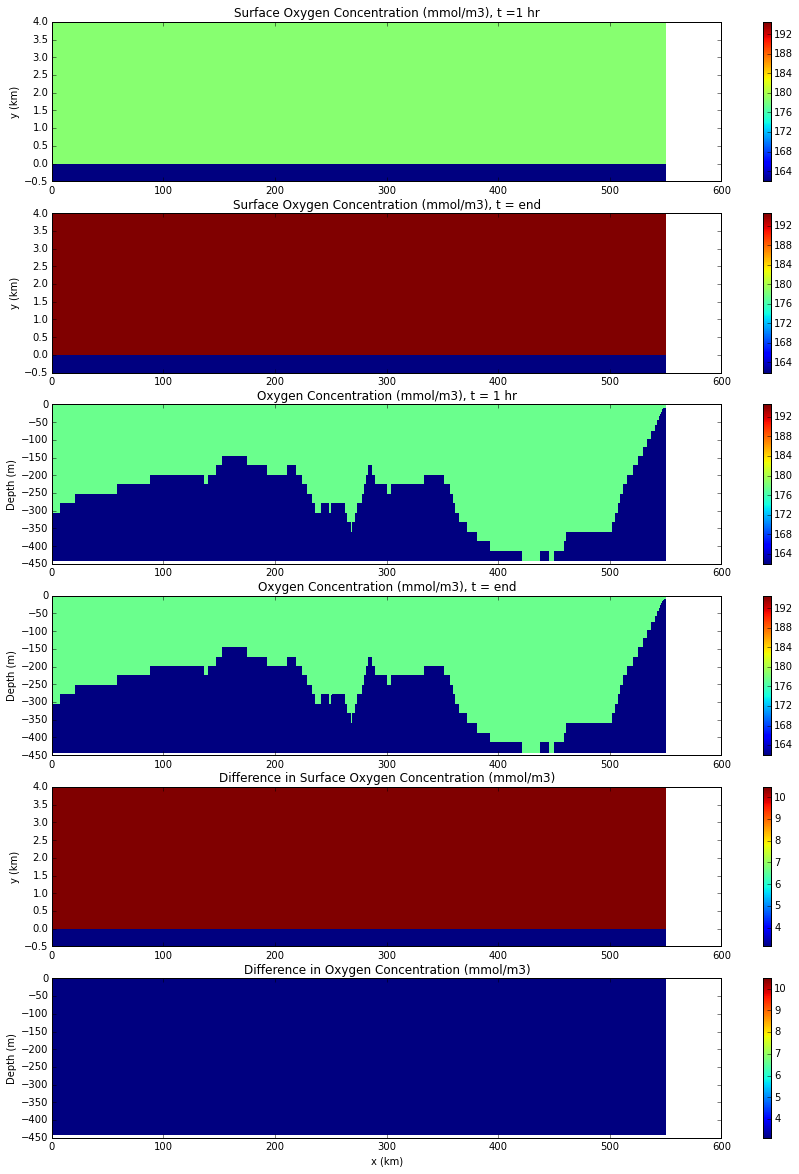

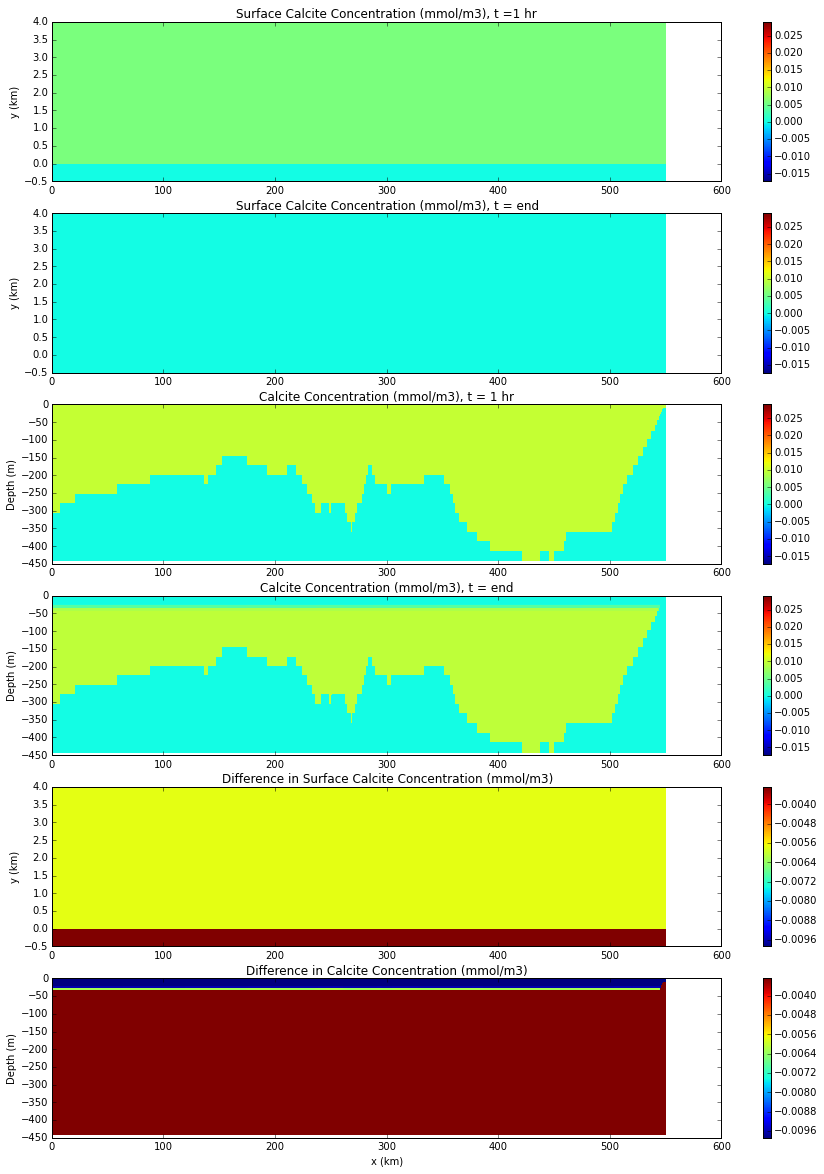

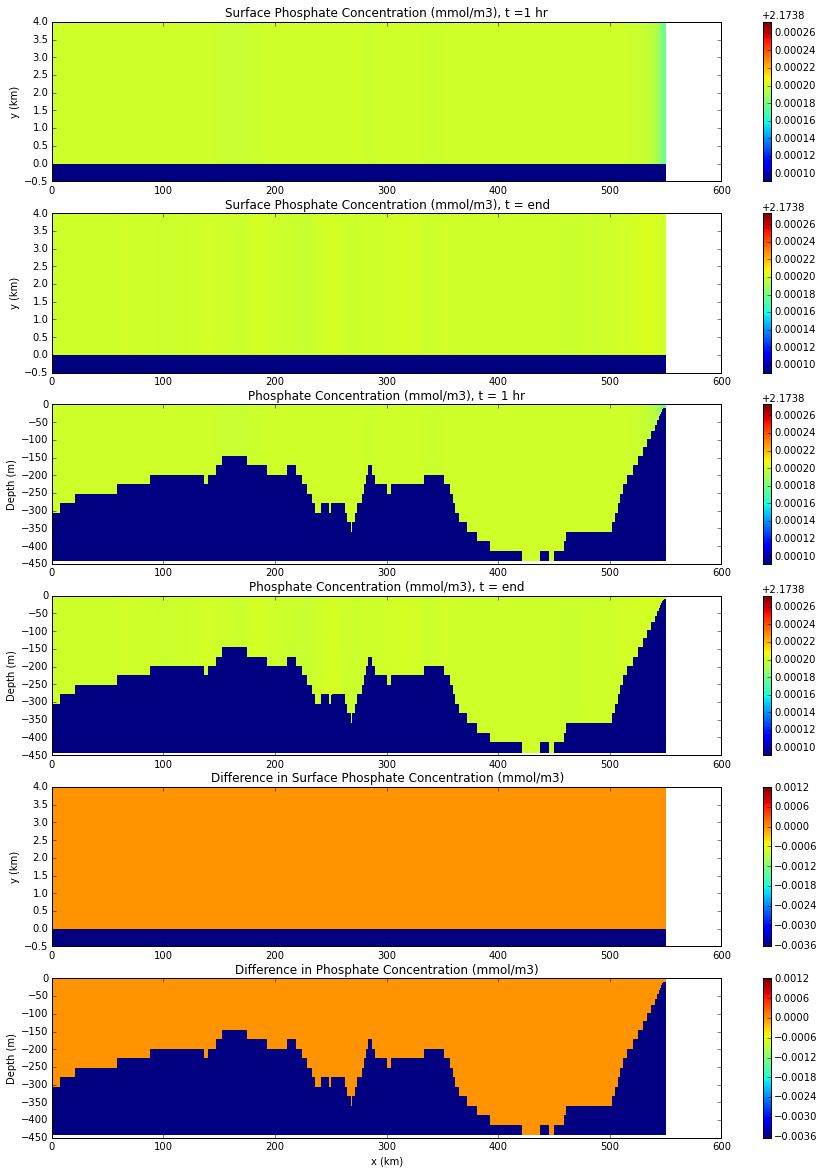

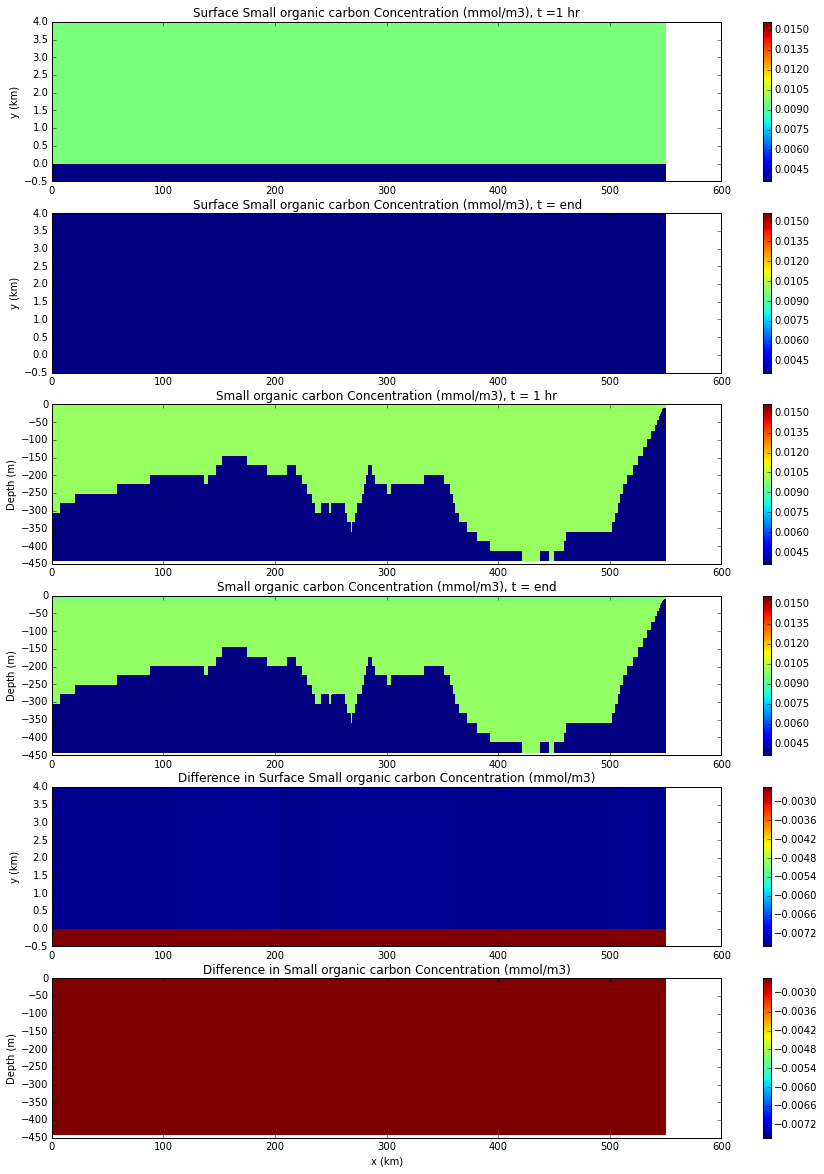

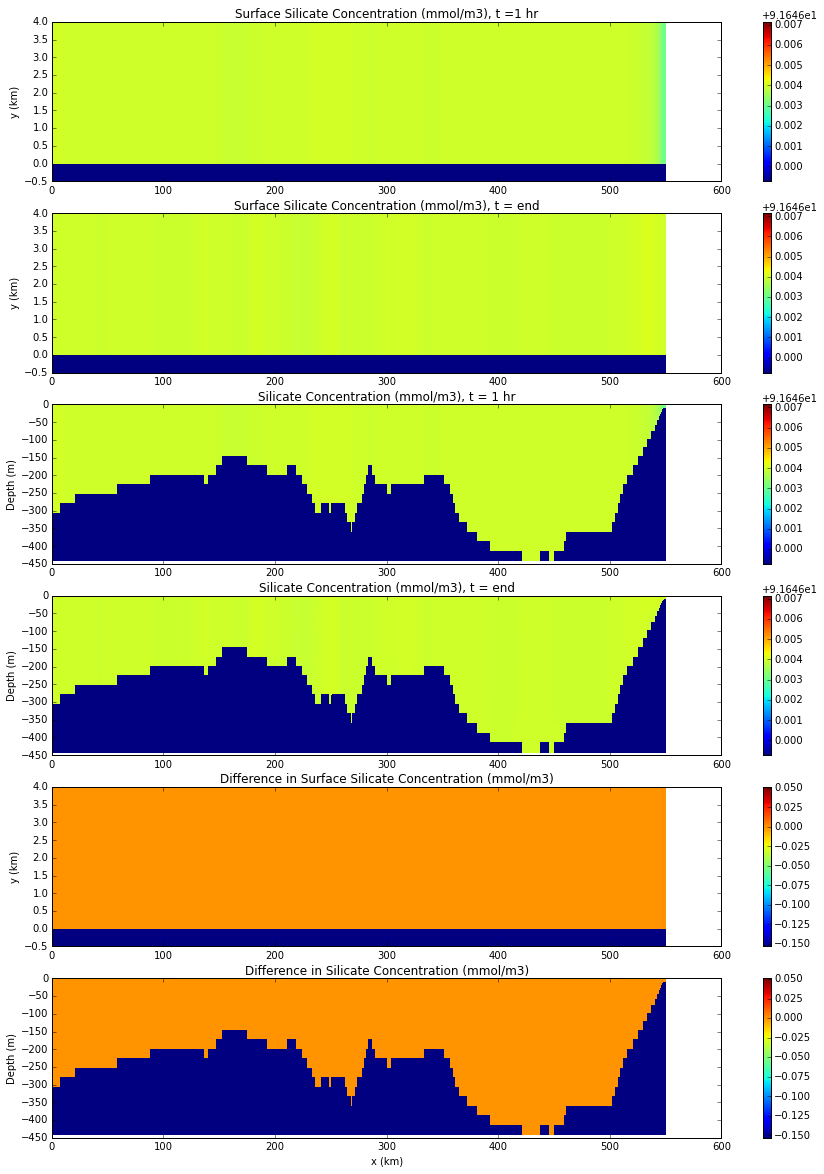

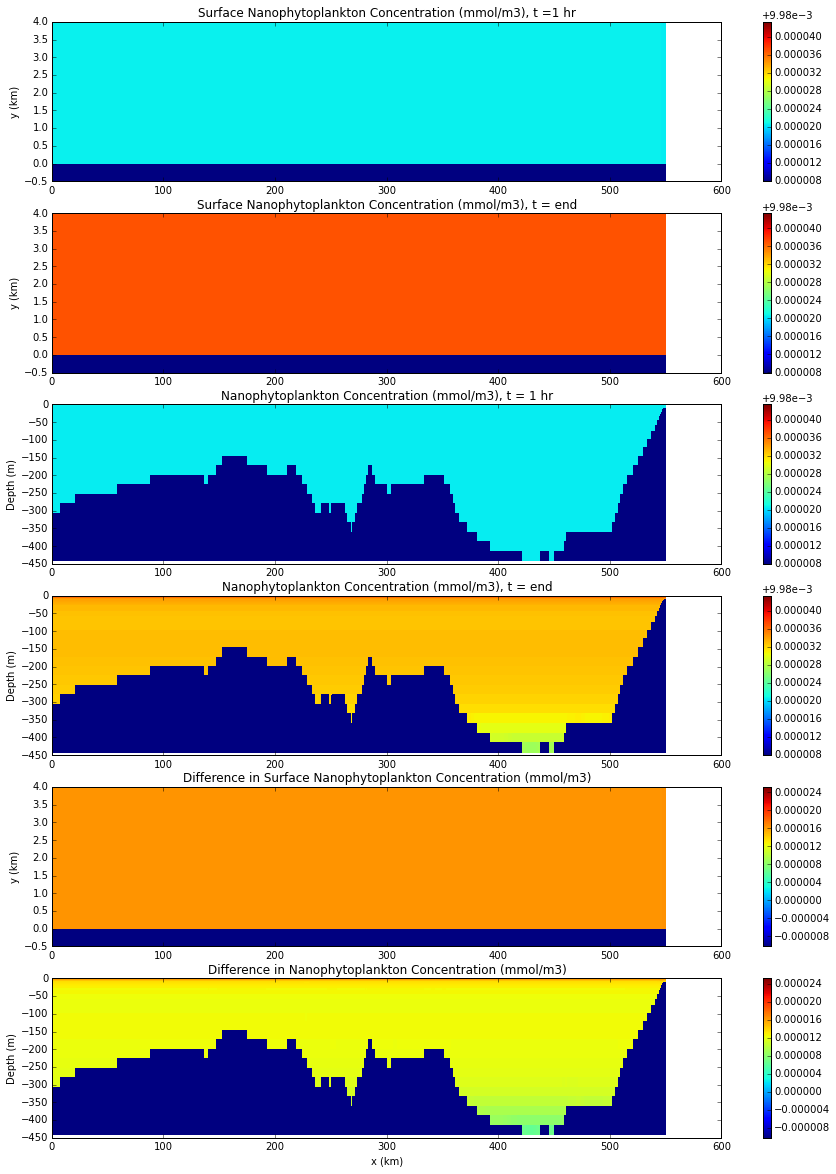

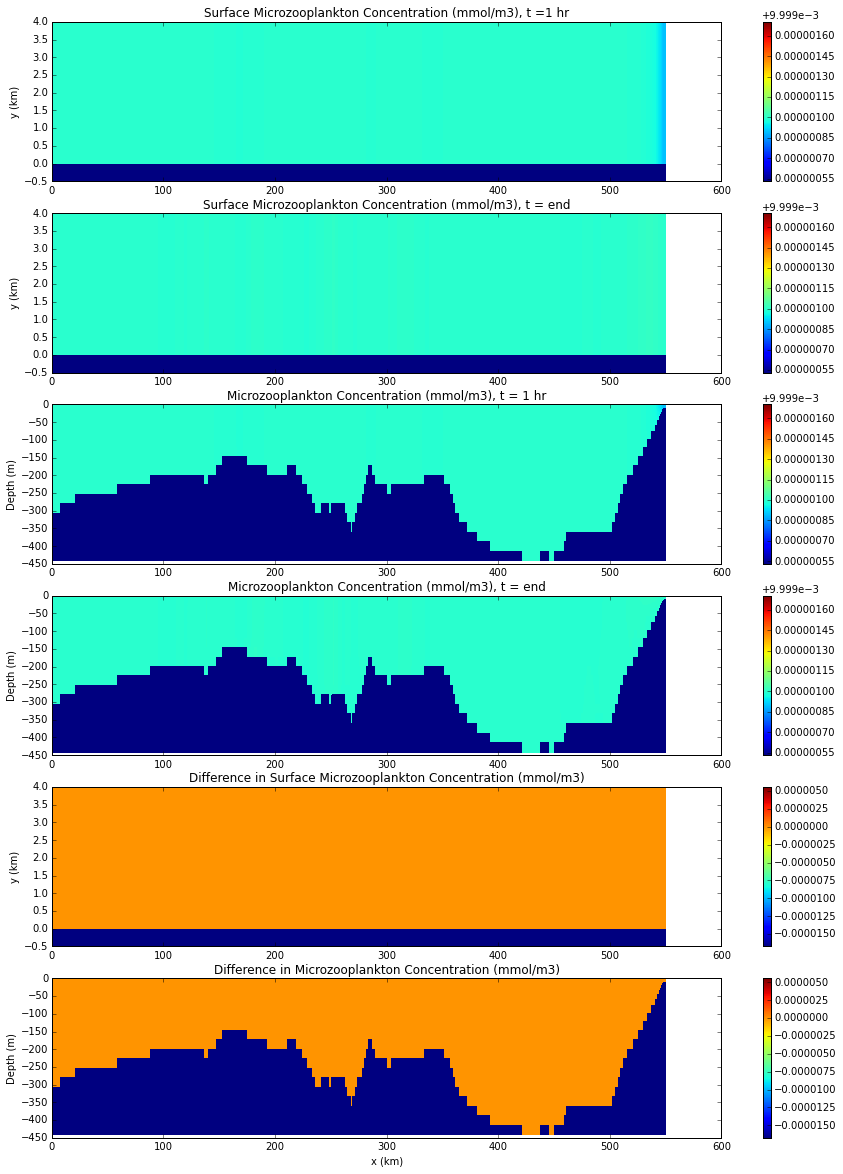

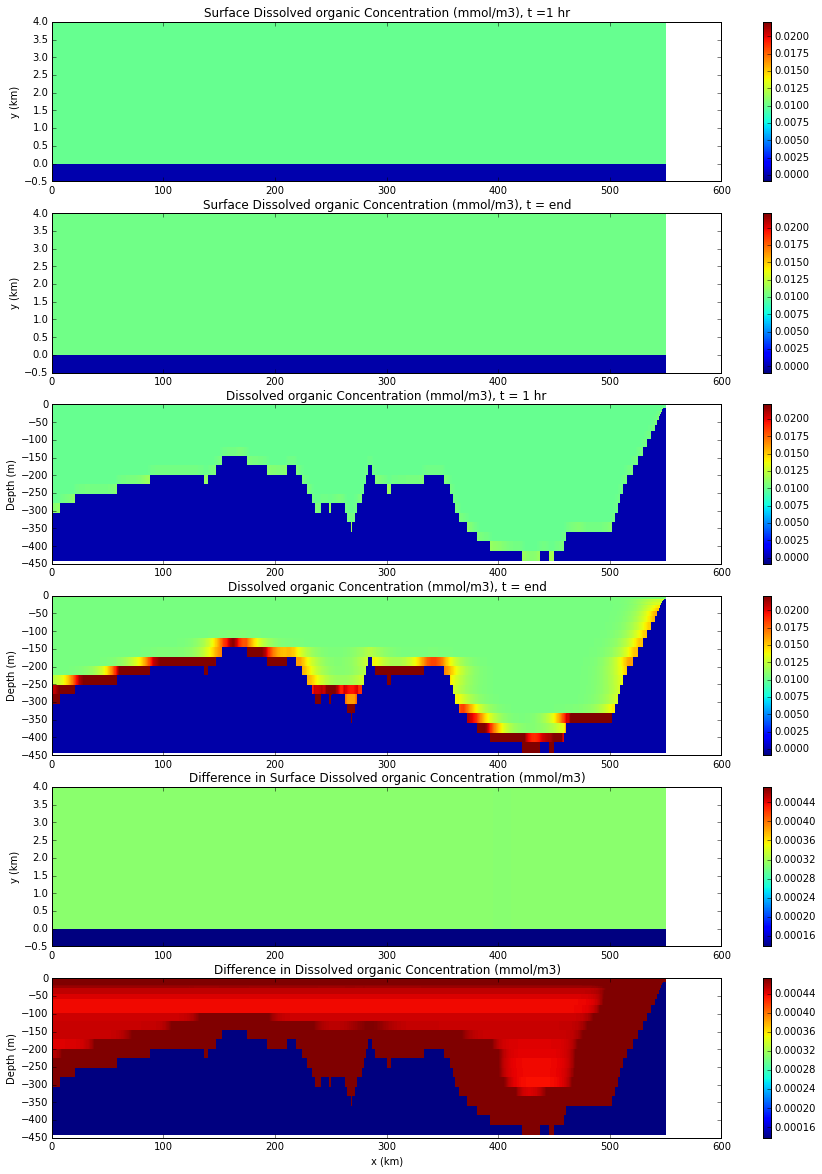

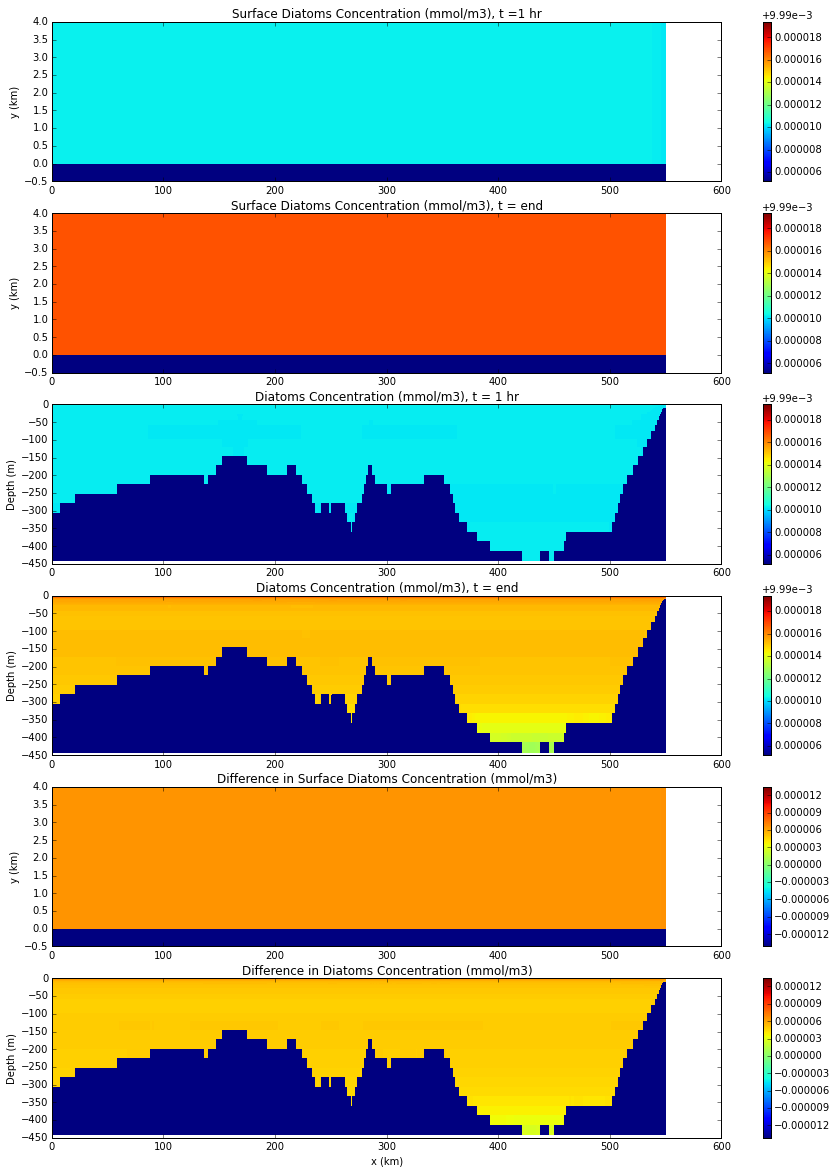

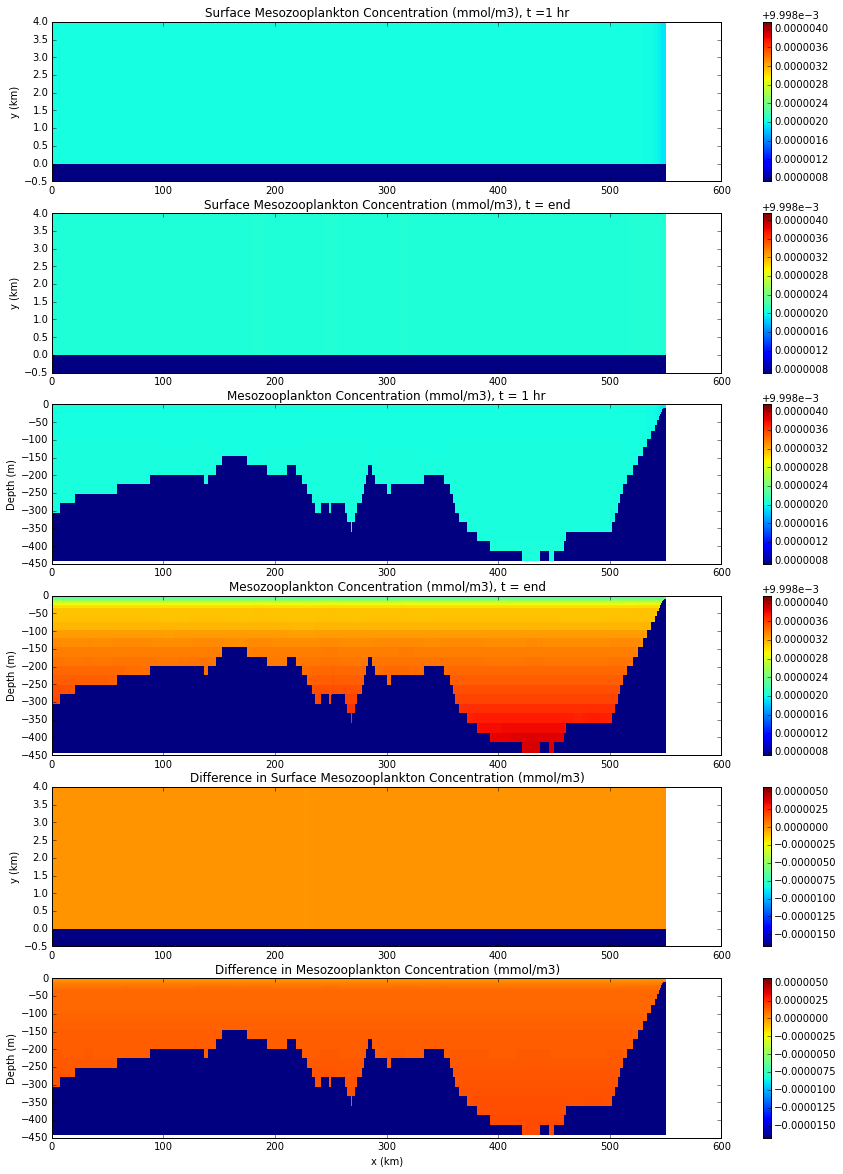

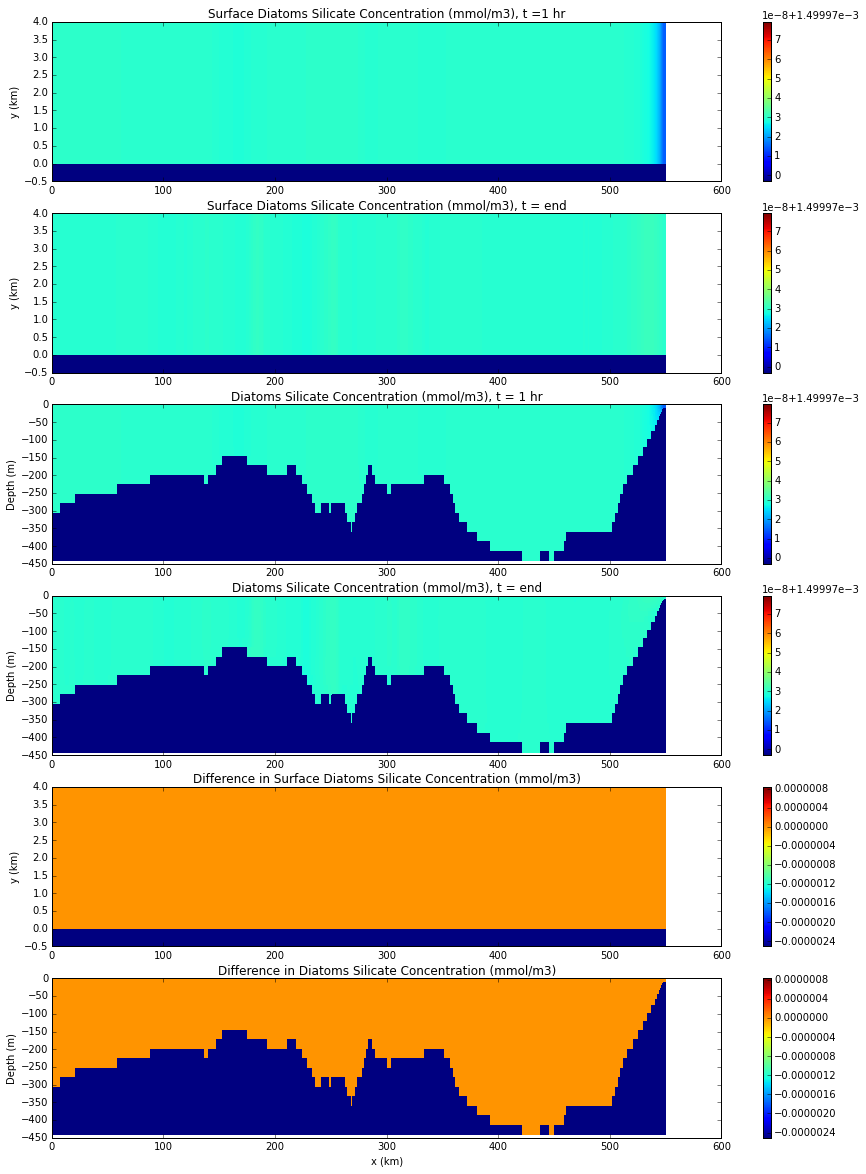

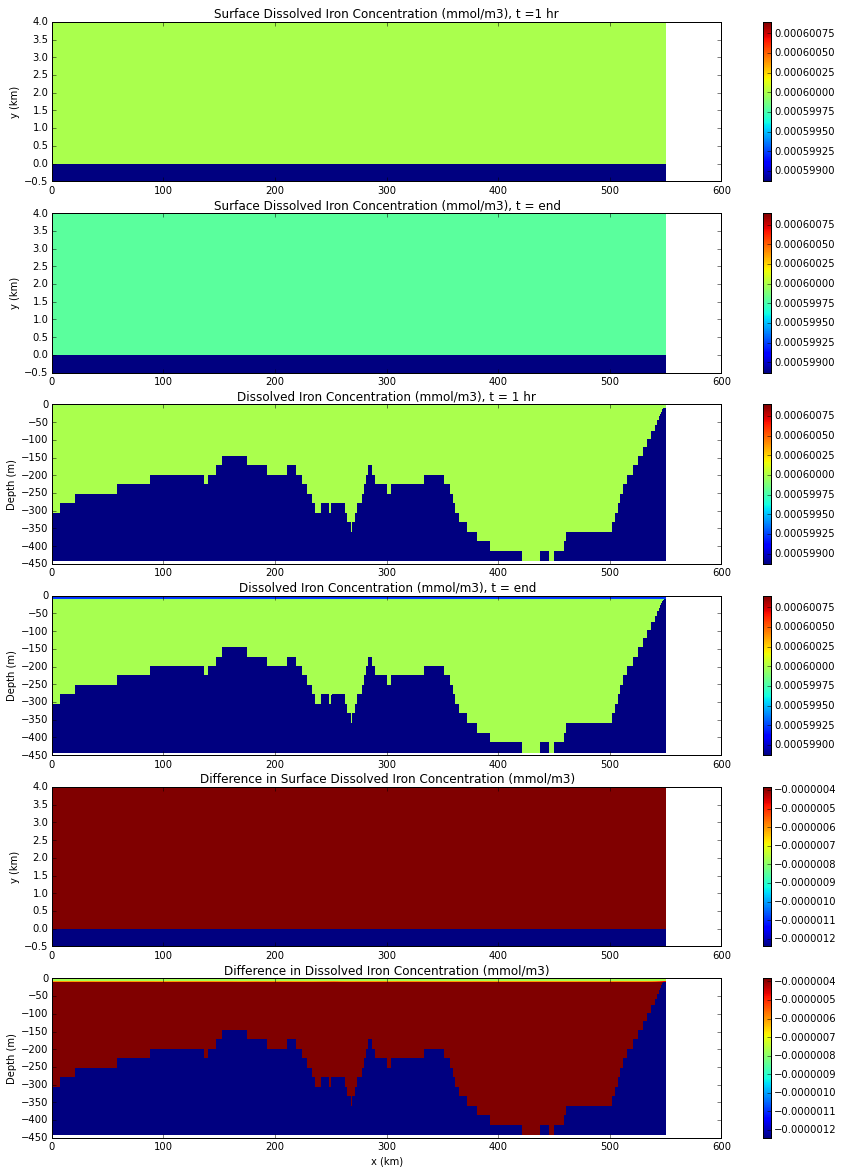

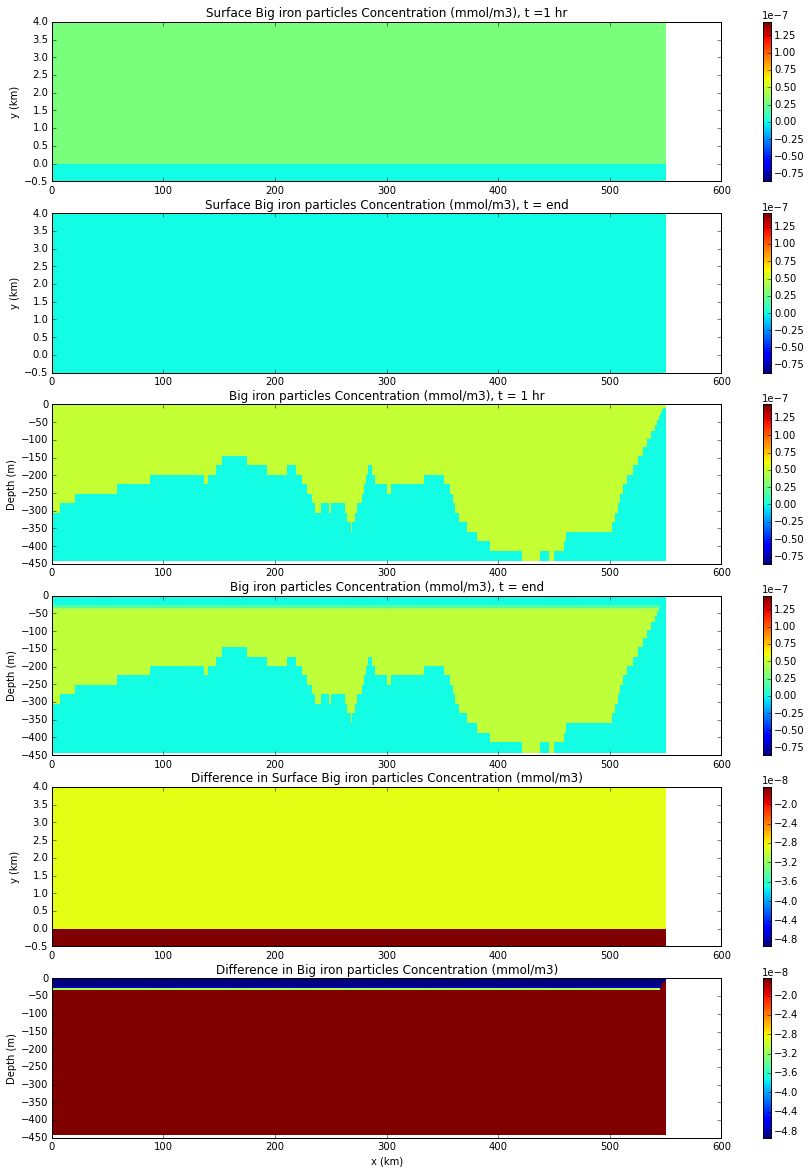

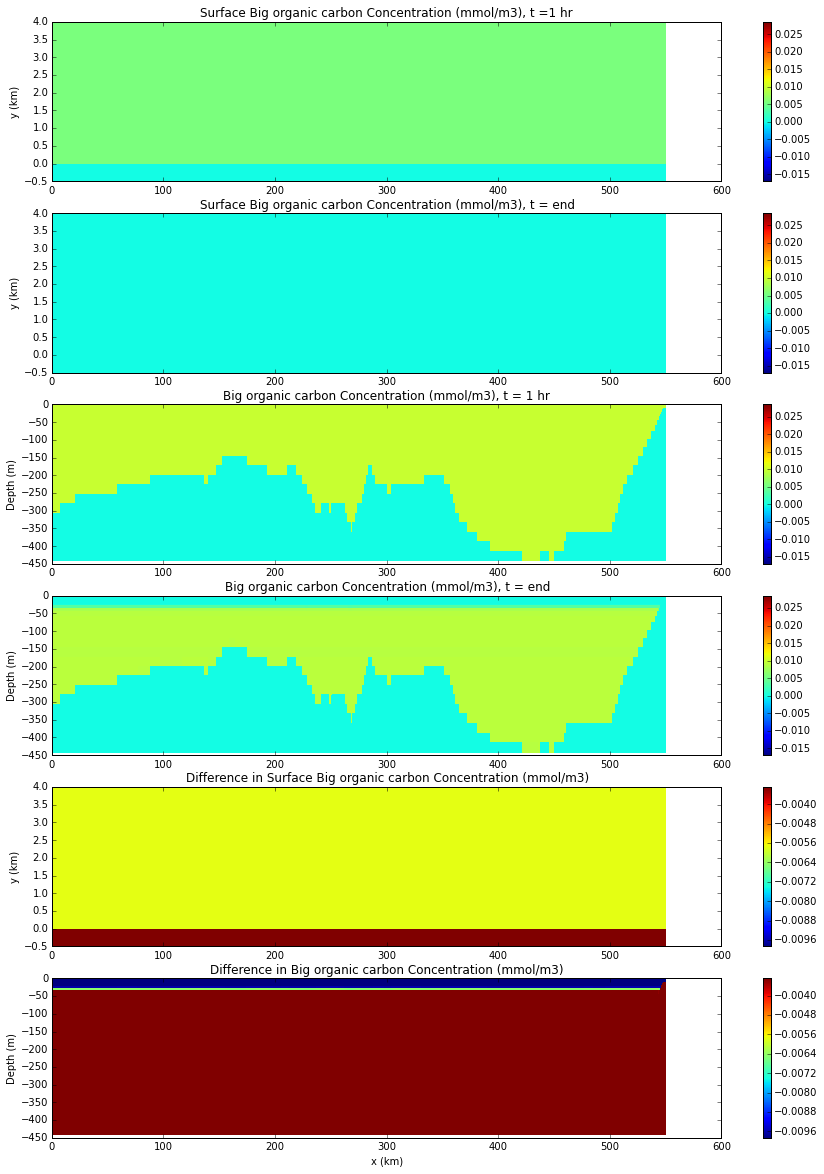

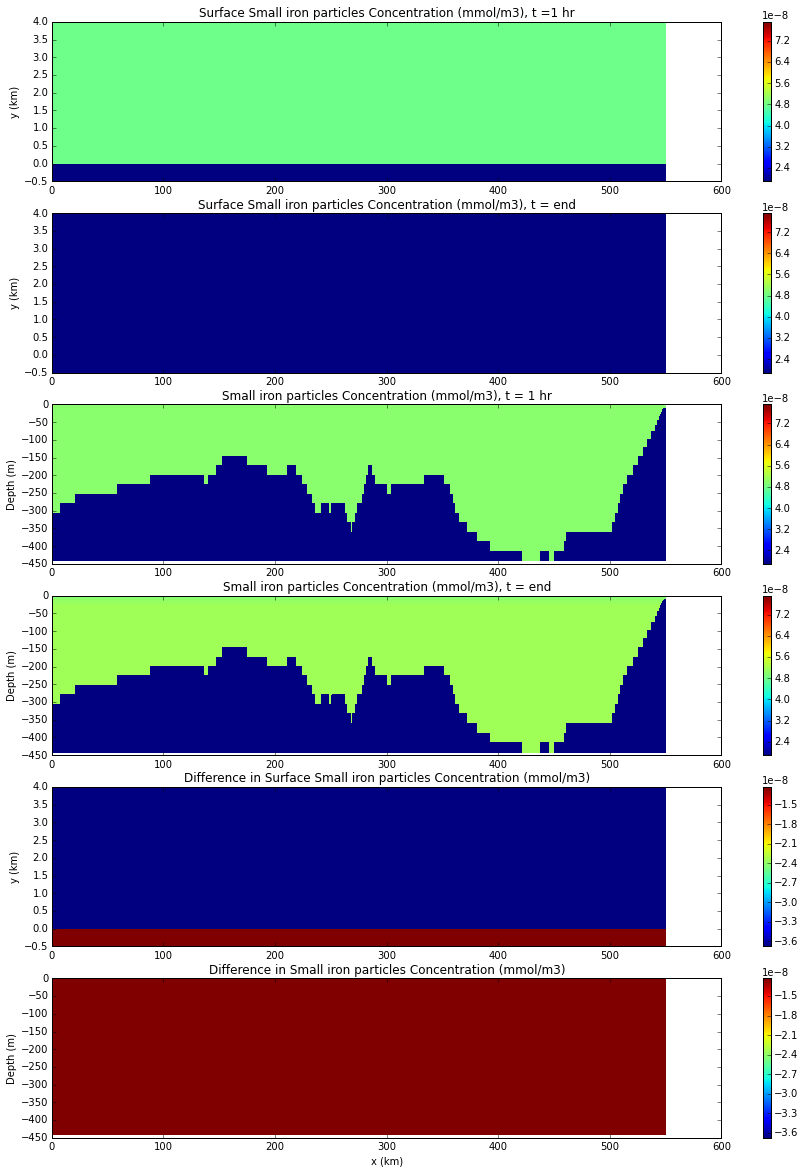

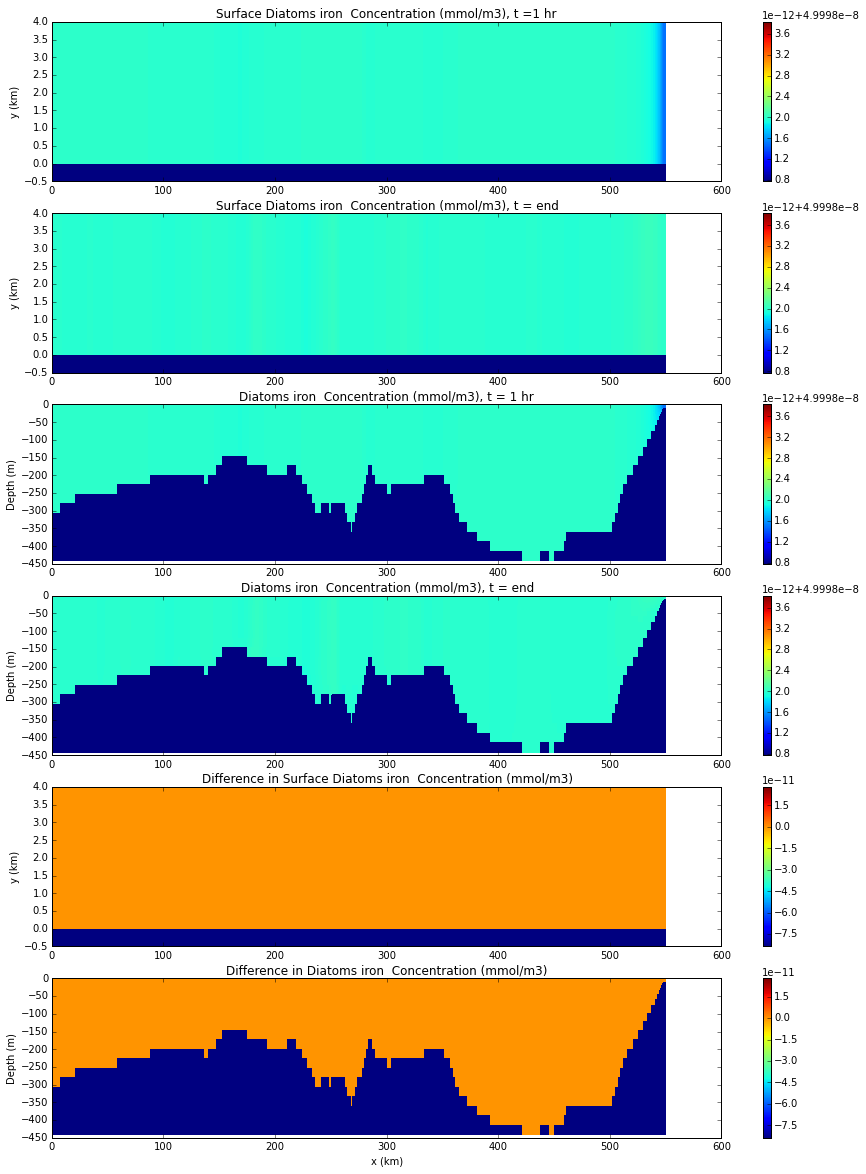

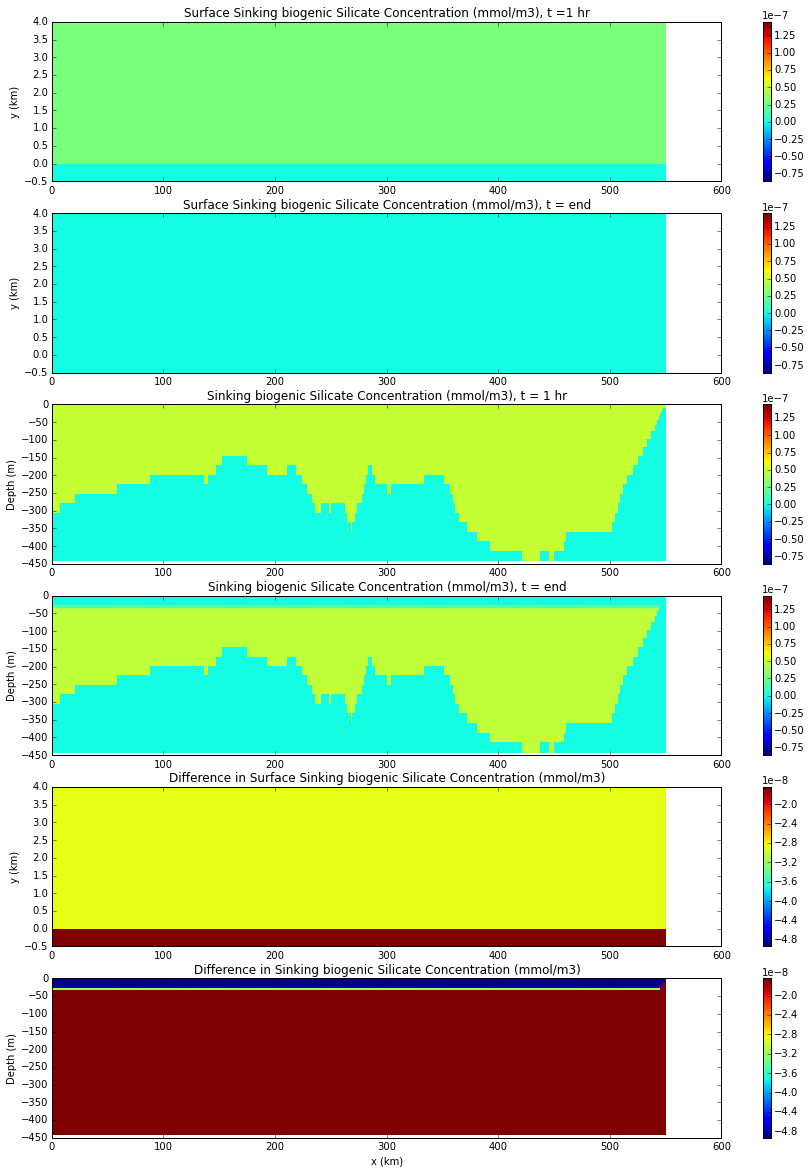

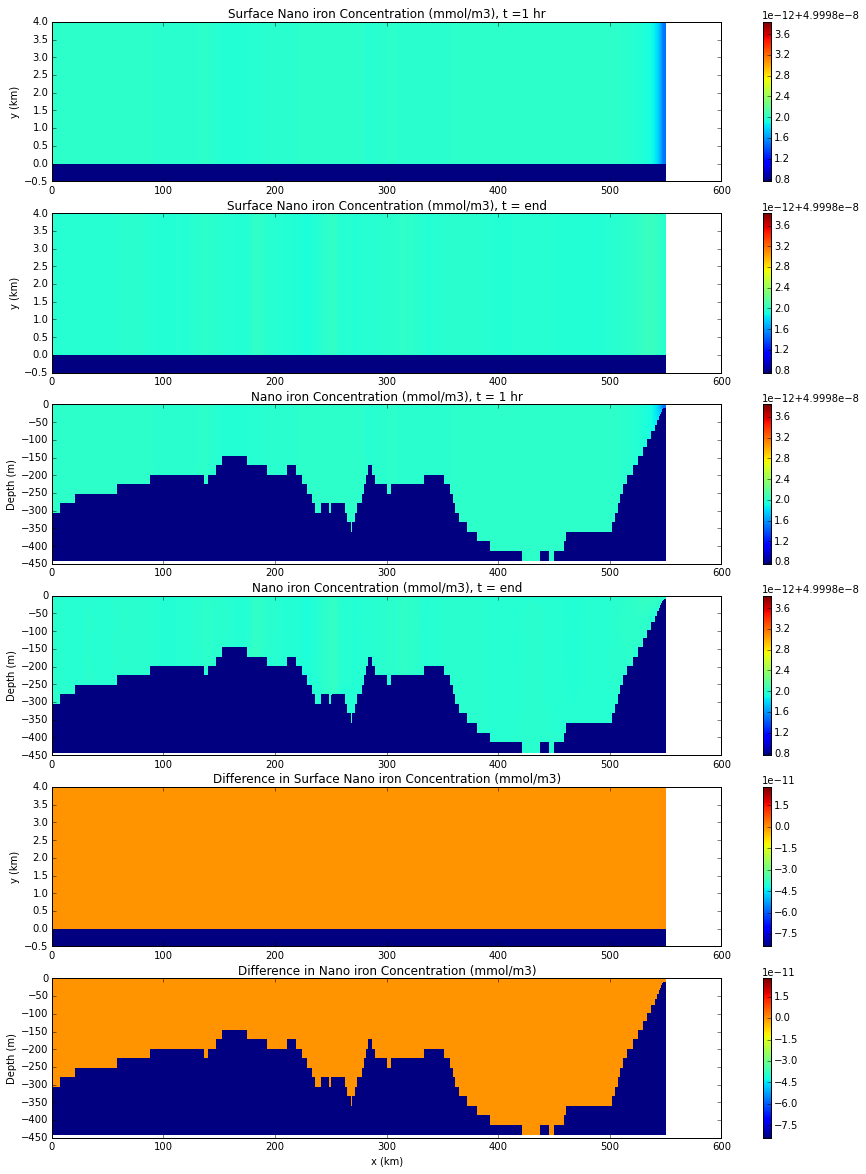

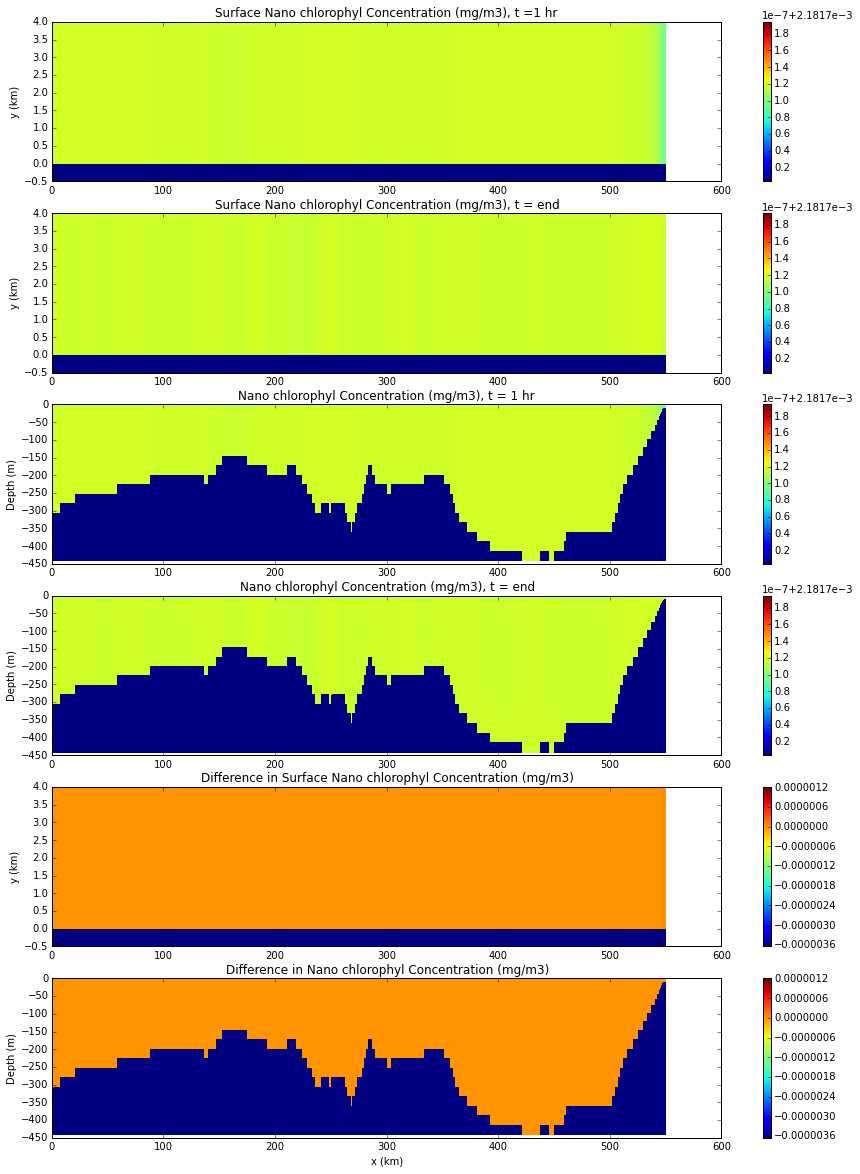

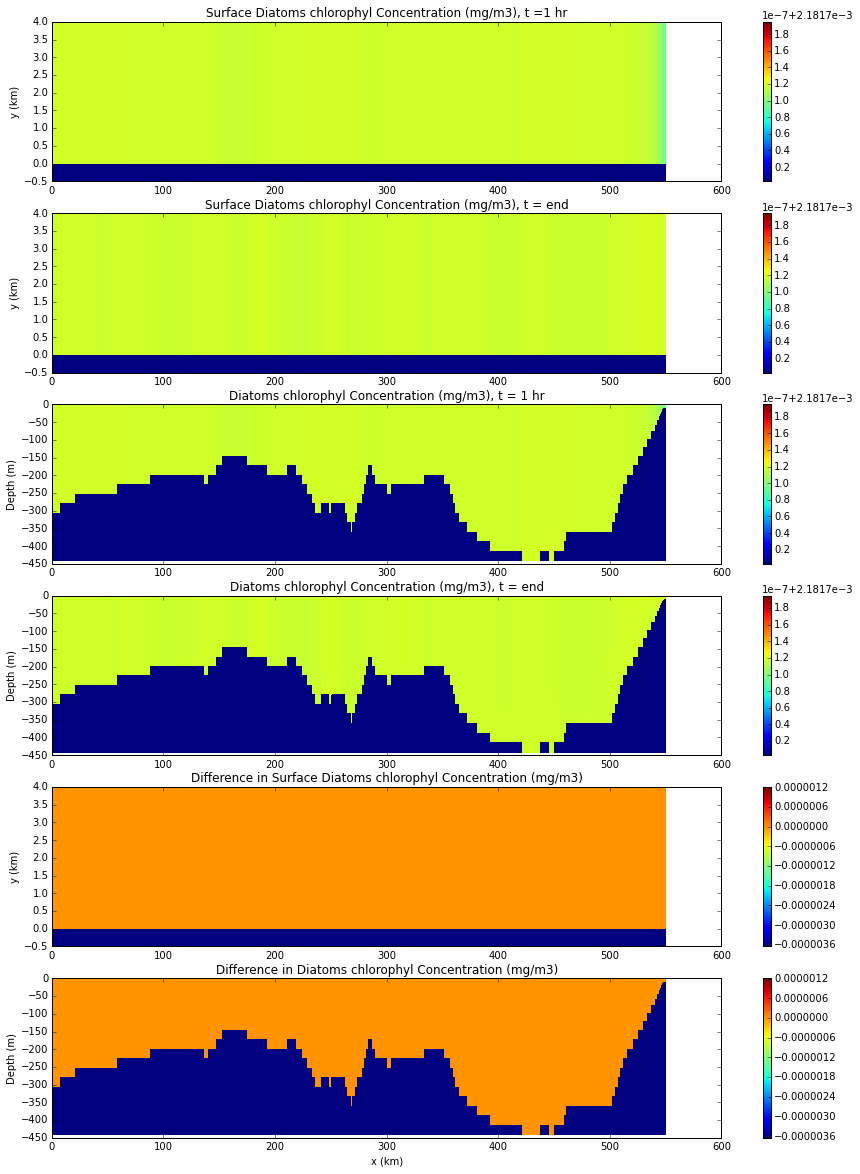

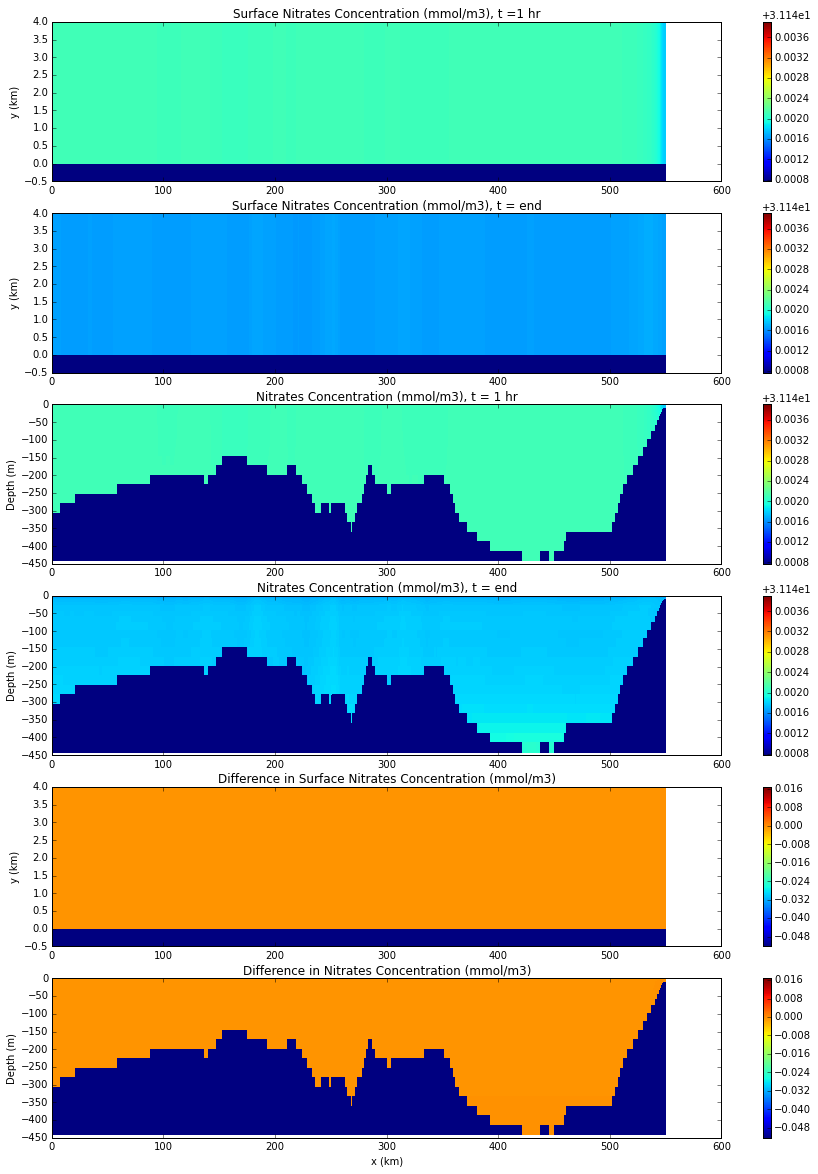

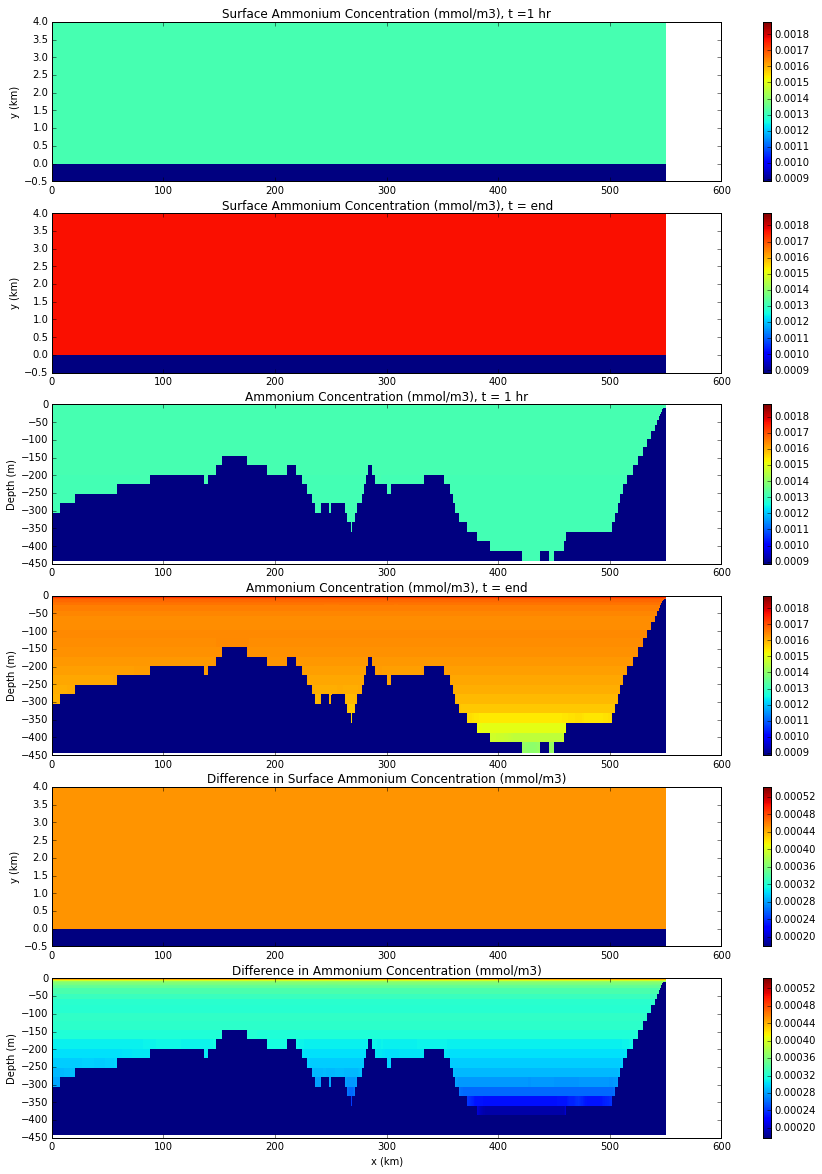

In [3]:
fname='SalishSea_1h_20150301_20150301_ptrc_T.nc'
plotAllVars(resultsDir,fname)

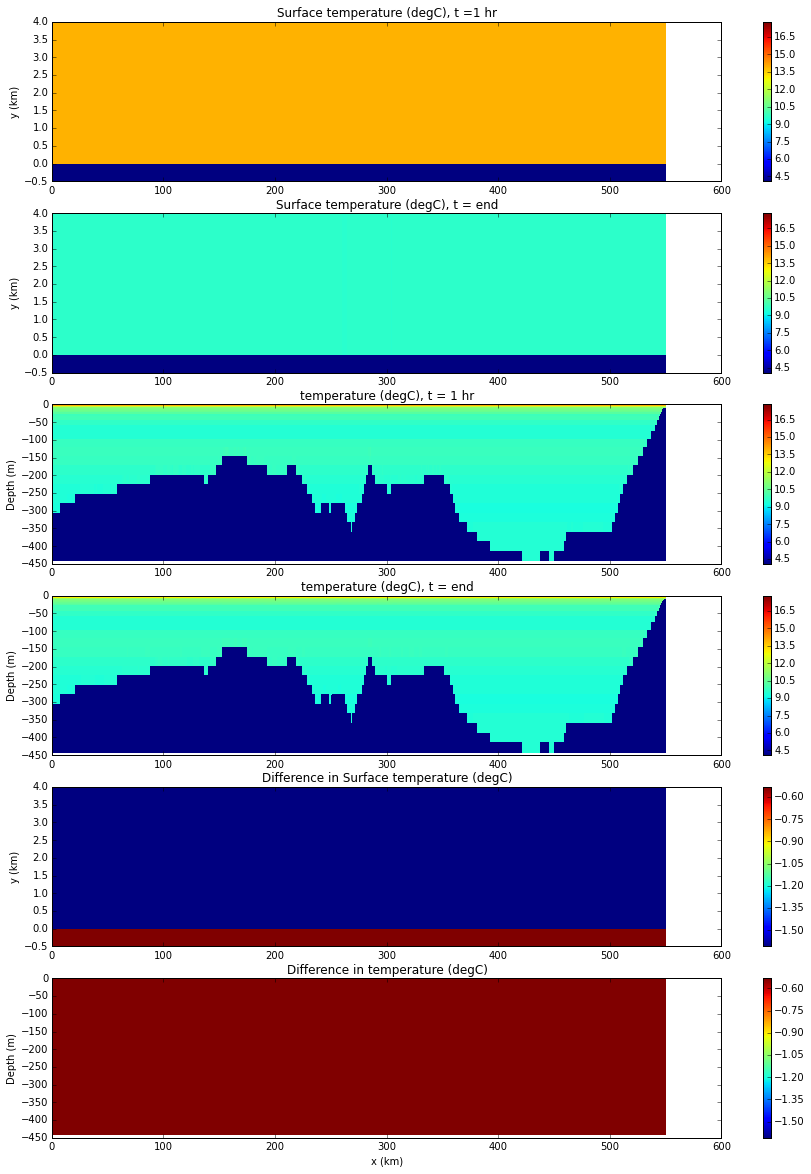

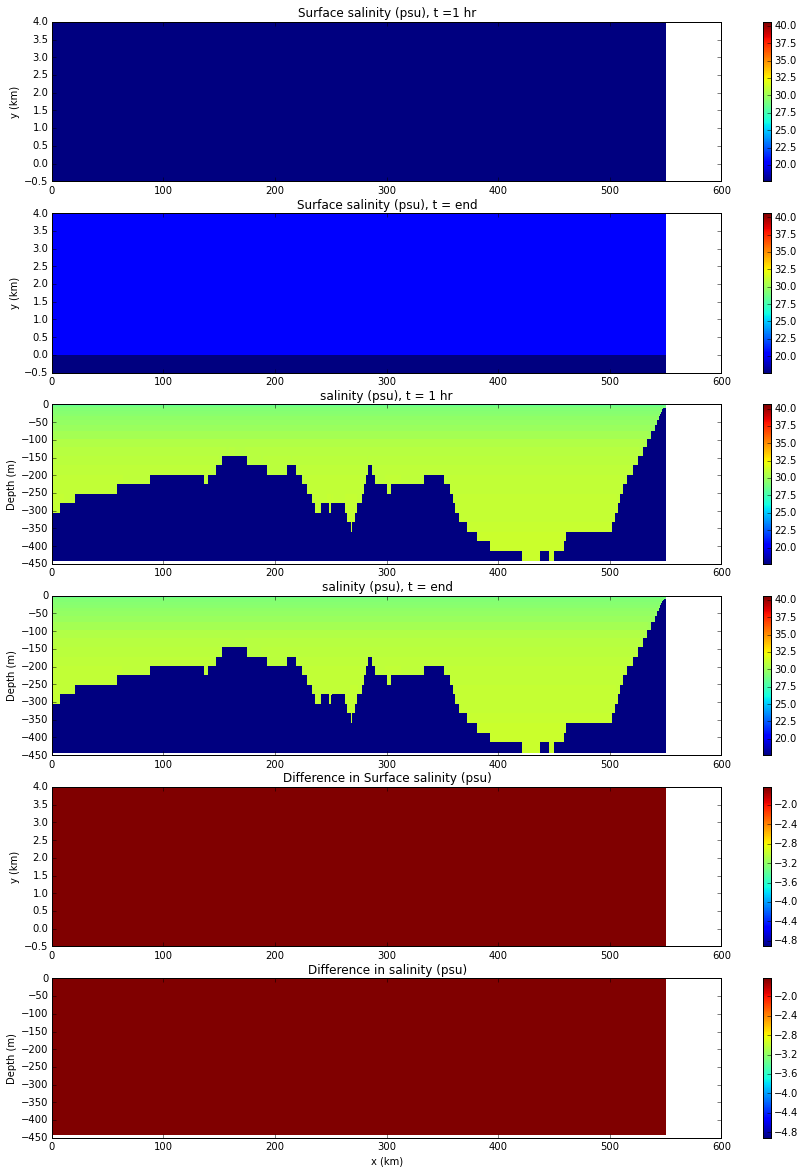

In [4]:
fname='SalishSea_1h_20150301_20150301_grid_T.nc'
plotAllVars(resultsDir,fname)

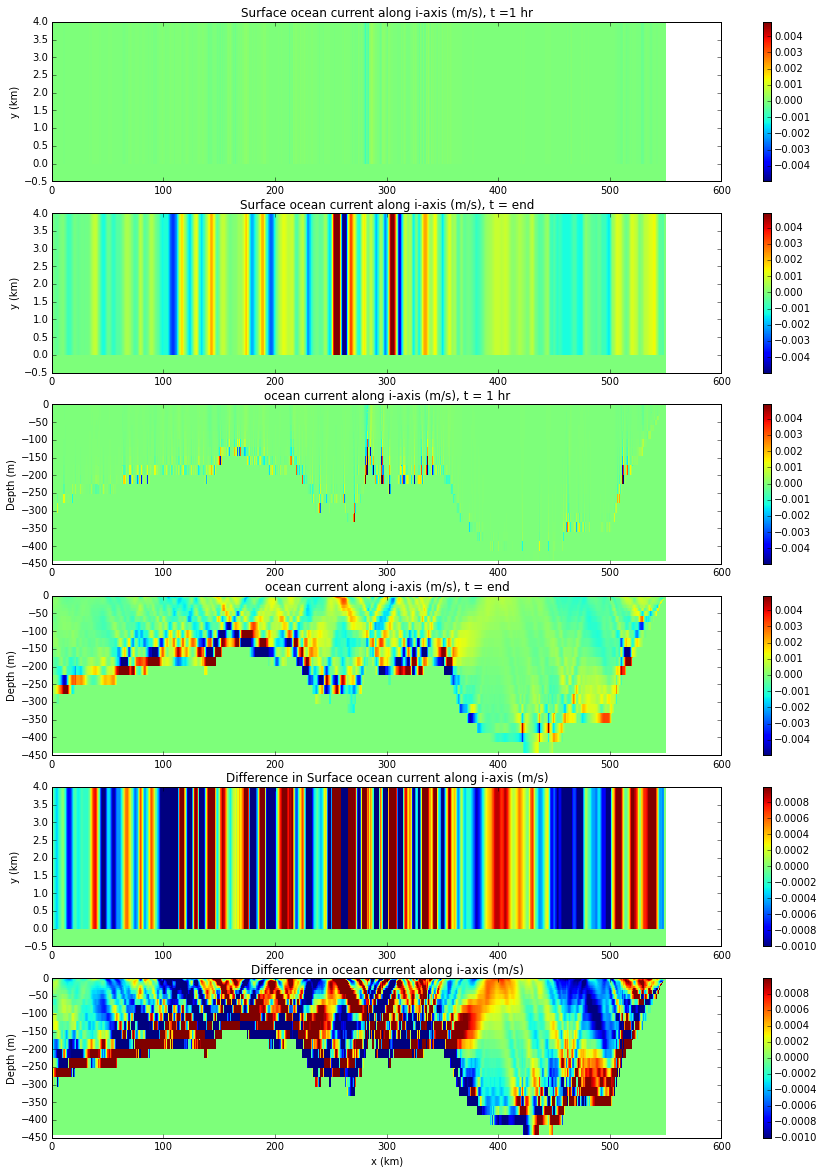

In [5]:
fname='SalishSea_1h_20150301_20150301_grid_U.nc'
plotAllVars(resultsDir,fname)

/home/eolson/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/eolson/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/eolson/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:83: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/home/eolson/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:95: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/eolson/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


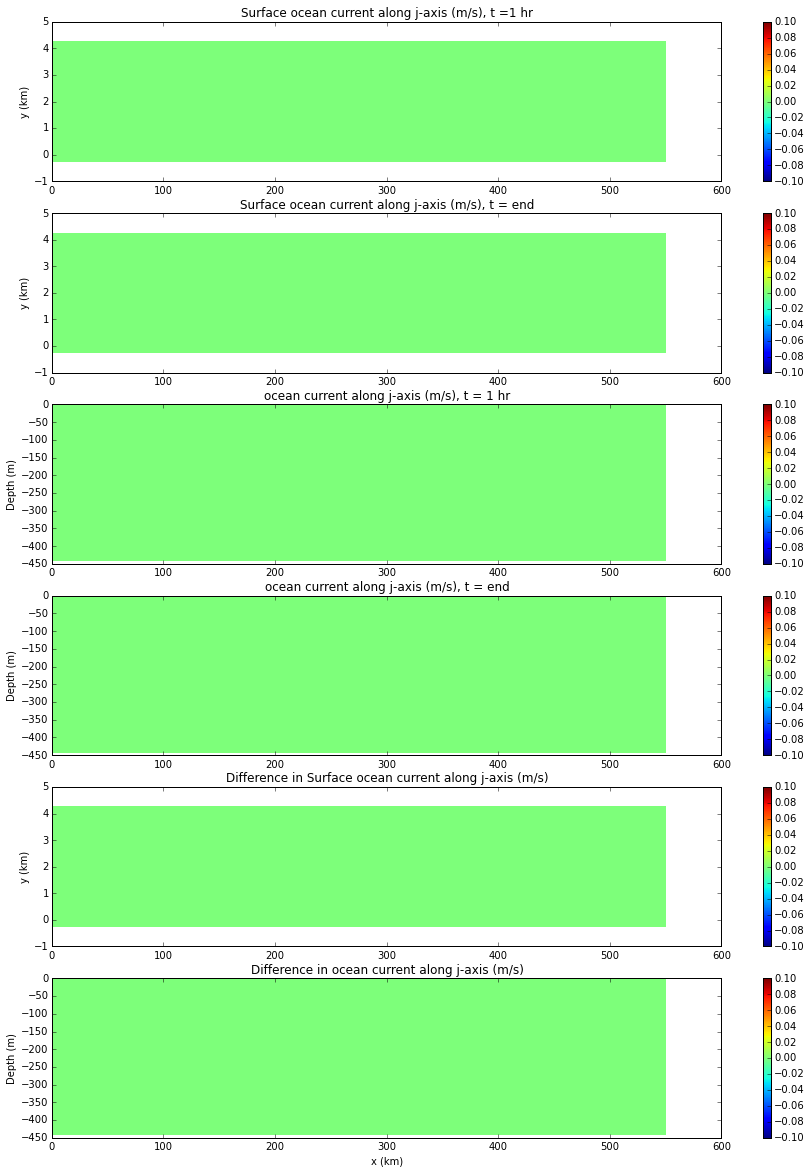

In [6]:
fname='SalishSea_1h_20150301_20150301_grid_V.nc'
plotAllVars(resultsDir,fname)